In [3]:
from matplotlib import pyplot as plt
import os 
os.makedirs('TMR_LBhsh',exist_ok=True)

In [4]:
def get_pos_neg(scores_file):
    positives = []
    negatives = []
    with open(scores_file,'r') as f:
        lines = f.read().split('\n')
        for line in lines:
            line_splits = line.split()
            if len(line_splits)==4:
                if line_splits[0]==line_splits[1]:
                    positives.append(float(line_splits[3]))
                else:
                    negatives.append(float(line_splits[3]))
    return positives,negatives

from bob.measure import far_threshold, eer_threshold, min_hter_threshold
import numpy as np

def fmr_fnmr(neg, pos, threshold):
    fmr, fnmr = 0, 0
    fmr = np.mean(np.where(np.array(neg) >= threshold,1,0))
    fnmr = np.mean(np.where(np.array(pos) < threshold,1,0))
    return fmr, fnmr

def get_Biohash_length(Biohash_length):
    if Biohash_length[0]=='0':
        return '0.'+Biohash_length[2:]
    elif Biohash_length[0]=='1':
        return '1.000'
    elif Biohash_length[0]=='2':
        return '2.000'

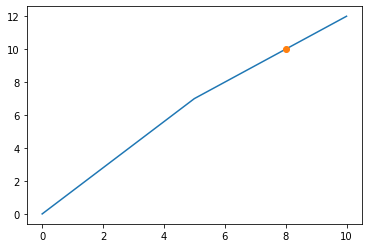

In [47]:
def get_LBHsh_4_baseline(all_Biohash_lengths,all_TMRs,TMR_Baseline):
    l=None
    for i in range(len(all_Biohash_lengths)-1):
        l1 = all_Biohash_lengths[i]
        l2 = all_Biohash_lengths[i+1]
        
        TMR1 = all_TMRs[i]
        TMR2 = all_TMRs[i+1]
        
        if (TMR_Baseline> TMR1) and (TMR_Baseline< TMR2):
            l = l1 + (l2-l1)/(TMR2-TMR1)*(TMR_Baseline-TMR1)
            break
        elif TMR_Baseline==TMR2:
            l = l2
            break
#     if l ==None:
#         l = get_LBHsh_4_baseline(all_Biohash_lengths,all_TMRs,TMR_Baseline*0.99)
    return l

all_Biohash_lengths=[0,5,10]
all_TMRs=[0,7,12]
TMR_Baseline=10
l=get_LBHsh_4_baseline(all_Biohash_lengths,all_TMRs,TMR_Baseline)
plt.plot(all_Biohash_lengths,all_TMRs)
plt.plot(l,TMR_Baseline,'o')

## Plot

\hline
VGG16_Oxford & 512 & - & - & 0.001 & 0.4097 & - & -  \\
VGG16_Oxford & 512 & 0.025 & 12 & 0.0 & 1.0 & 0.0 & 1.0 \\
VGG16_Oxford & 512 & 0.050 & 25 & 0.001 & 0.636 & 0.0 & 1.0 \\
VGG16_Oxford & 512 & 0.075 & 38 & 0.0007 & 0.3927 & 0.0 & 1.0 \\
VGG16_Oxford & 512 & 0.100 & 51 & 0.001 & 0.1987 & 0.0003 & 0.9493 \\
VGG16_Oxford & 512 & 0.125 & 64 & 0.0003 & 0.0513 & 0.0 & 0.9303 \\
VGG16_Oxford & 512 & 0.150 & 76 & 0.0 & 0.0477 & 0.0003 & 0.8833 \\
VGG16_Oxford & 512 & 0.175 & 89 & 0.0007 & 0.057 & 0.001 & 0.848 \\
VGG16_Oxford & 512 & 0.200 & 102 & 0.0007 & 0.0373 & 0.0007 & 0.7533 \\
VGG16_Oxford & 512 & 0.300 & 153 & 0.001 & 0.0077 & 0.0003 & 0.5743 \\
VGG16_Oxford & 512 & 0.400 & 204 & 0.001 & 0.0033 & 0.001 & 0.505 \\
VGG16_Oxford & 512 & 0.500 & 256 & 0.001 & 0.003 & 0.001 & 0.5047 \\
VGG16_Oxford & 512 & 0.600 & 307 & 0.001 & 0.0023 & 0.001 & 0.4067 \\
VGG16_Oxford & 512 & 0.700 & 358 & 0.0007 & 0.002 & 0.0007 & 0.456 \\
VGG16_Oxford & 512 & 0.800 & 409 & 0.001 & 0.002 & 0.00

\hline
VGG16_Oxford & 512 & - & - & 0.001 & 0.376 & - & -  \\
VGG16_Oxford & 512 & 0.025 & 12 & 0.0 & 1.0 & 0.0 & 1.0 \\
VGG16_Oxford & 512 & 0.050 & 25 & 0.0 & 1.0 & 0.0 & 1.0 \\
VGG16_Oxford & 512 & 0.075 & 38 & 0.0004 & 0.18 & 0.0 & 1.0 \\
VGG16_Oxford & 512 & 0.100 & 51 & 0.0007 & 0.0934 & 0.0008 & 0.9642 \\
VGG16_Oxford & 512 & 0.125 & 64 & 0.0009 & 0.0102 & 0.0009 & 0.932 \\
VGG16_Oxford & 512 & 0.150 & 76 & 0.0009 & 0.0005 & 0.0007 & 0.9172 \\
VGG16_Oxford & 512 & 0.175 & 89 & 0.001 & 0.0059 & 0.0008 & 0.8372 \\
VGG16_Oxford & 512 & 0.200 & 102 & 0.001 & 0.0016 & 0.001 & 0.873 \\
VGG16_Oxford & 512 & 0.300 & 153 & 0.001 & 0.0 & 0.001 & 0.6703 \\
VGG16_Oxford & 512 & 0.400 & 204 & 0.001 & 0.0 & 0.001 & 0.5599 \\
VGG16_Oxford & 512 & 0.500 & 256 & 0.001 & 0.0 & 0.0009 & 0.5098 \\
VGG16_Oxford & 512 & 0.600 & 307 & 0.0009 & 0.0 & 0.001 & 0.5156 \\
VGG16_Oxford & 512 & 0.700 & 358 & 0.001 & 0.0 & 0.001 & 0.5002 \\
VGG16_Oxford & 512 & 0.800 & 409 & 0.001 & 0.0 & 0.001 & 0.4805 \\
VG

IncResV1_MSCeleb & 128 & 1.000 & 128 & 0.0009 & 0.0 & 0.0009 & 0.2778 \\
IncResV1_MSCeleb & 128 & 2.000 & 256 & 0.001 & 0.0 & 0.0008 & 0.4259 \\
******** LBHsh_4_baseline: 32.8443309352518 0.25659633543165467
\hline
IncResV2_MSCeleb & 128 & - & - & 0.001 & 0.0331 & - & -  \\
IncResV2_MSCeleb & 128 & 0.100 & 12 & 0.0009 & 0.7331 & 0.0 & 1.0 \\
IncResV2_MSCeleb & 128 & 0.200 & 25 & 0.0009 & 0.0853 & 0.001 & 0.7626 \\
IncResV2_MSCeleb & 128 & 0.300 & 38 & 0.001 & 0.0181 & 0.001 & 0.7041 \\
IncResV2_MSCeleb & 128 & 0.400 & 51 & 0.001 & 0.0007 & 0.0009 & 0.6533 \\
IncResV2_MSCeleb & 128 & 0.500 & 64 & 0.001 & 0.0011 & 0.0009 & 0.3737 \\
IncResV2_MSCeleb & 128 & 0.600 & 76 & 0.001 & 0.0 & 0.0009 & 0.334 \\
IncResV2_MSCeleb & 128 & 0.700 & 89 & 0.001 & 0.0 & 0.0009 & 0.2934 \\
IncResV2_MSCeleb & 128 & 0.800 & 102 & 0.0009 & 0.0 & 0.0009 & 0.4719 \\
IncResV2_MSCeleb & 128 & 0.900 & 115 & 0.001 & 0.0 & 0.001 & 0.1896 \\
IncResV2_MSCeleb & 128 & 1.000 & 128 & 0.0009 & 0.0 & 0.0009 & 0.1955 \\
In

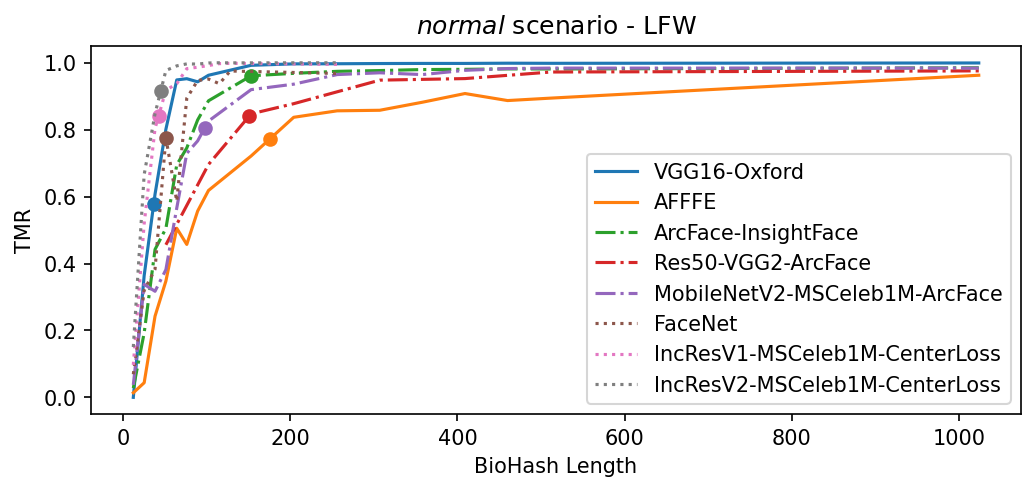

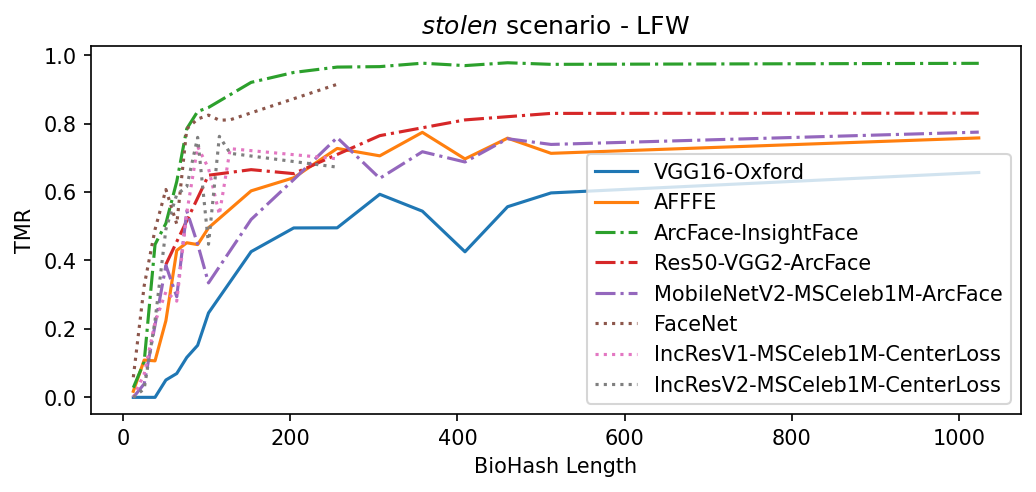

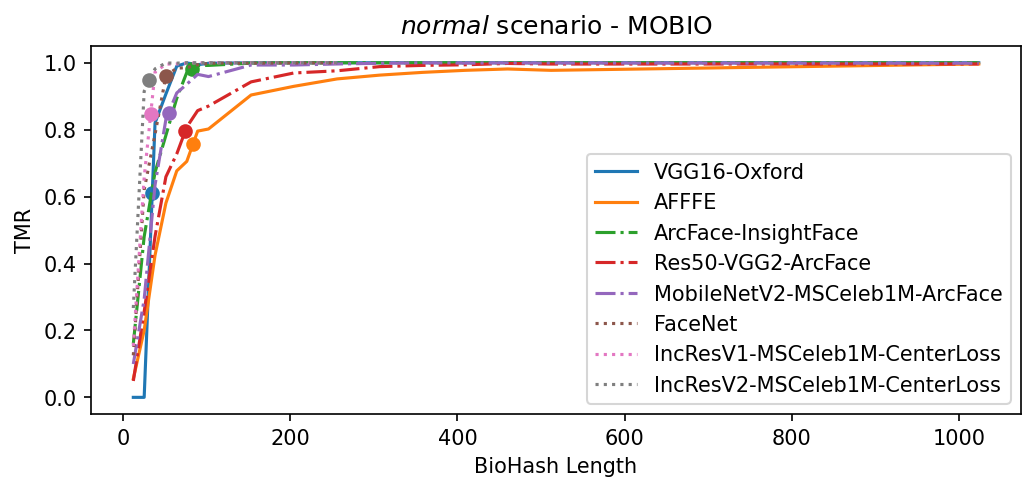

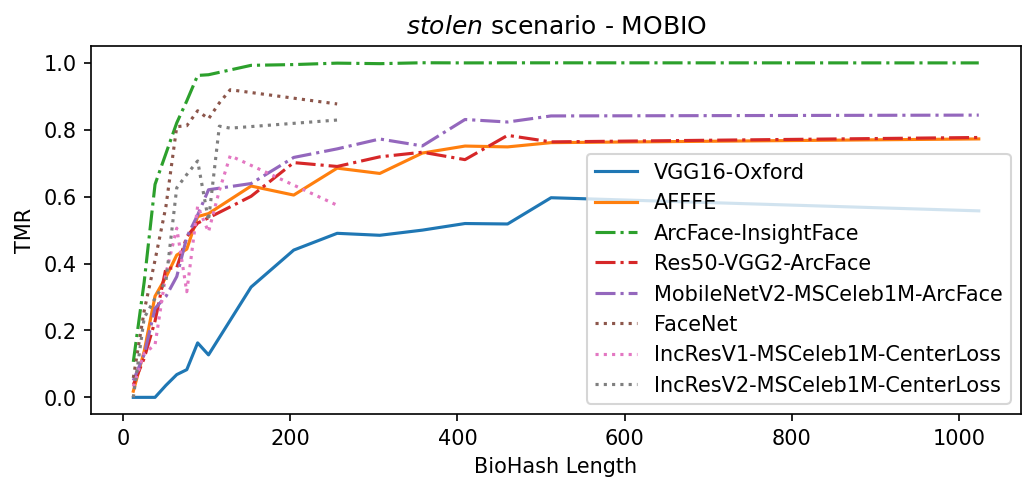

In [59]:
FMR_threshold = 1e-3

for dataset in ['LFW','mobio-all']:    
    with open(f'table_{dataset}.txt','w') as f:
        pass

    both_128_512=[]
    
    embedding_length=512
    all_Face_Rec = ['VGG16_Oxford','AFFFE','ArcFace','Res50_VGG2_ArcFace','MobileNetV2_MSCeleb_ArcFace_2021']
    both_128_512.append([embedding_length,all_Face_Rec])

    embedding_length=128
    all_Face_Rec = ['FaceNet','IncResV1_MSCeleb','IncResV2_MSCeleb']
    both_128_512.append([embedding_length,all_Face_Rec])

    all_models = ['Baseline','Biohash']
    all_Biohash_lengths = ['0_025','0_050','0_075','0_100','0_125','0_150','0_175','0_200','0_300','0_400','0_500','0_600','0_700','0_800','0_900','1_000','2_000']



    plot_normal_scenario = plt.figure(figsize=(8, 3.25), dpi=150)
    #plt.plot([int(512*.025),2*512],[0.75,0.75],'--')
    plot_stolen_scenario = plt.figure(figsize=(8, 3.25), dpi=150)
    #plt.plot([int(512*.025),2*512],[0.75,0.75],'--')
    all_legends = [#'TMR=0.75', 
                   'VGG16-Oxford','AFFFE',
                   'ArcFace-InsightFace','Res50-VGG2-ArcFace','MobileNetV2-MSCeleb1M-ArcFace',
                   'FaceNet','IncResV1-MSCeleb1M-CenterLoss','IncResV2-MSCeleb1M-CenterLoss'
                  ]
    all_colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
    c=-1

    for embedding_length,all_Face_Rec in both_128_512:
        
        for Face_Rec in all_Face_Rec:
            c+=1
        
            for model in all_models:
                if model=='Biohash':
                    normal_scenario_Biohash_lengths=[]
                    stolen_scenario_Biohash_lengths=[]
                    normal_scenario_TMRs=[]
                    stolen_scenario_TMRs=[]
                    for Biohash_length in all_Biohash_lengths:
                        
                                
                        try:
                            scores_file = '../../'+dataset+'/'+Face_Rec+'/models/'+model+'/'+Biohash_length+'/normal/'+'results/scores-dev'
                            positives,negatives = get_pos_neg(scores_file)
                            # threshold = min_hter_threshold(negatives, positives)
                            # threshold = eer_threshold(negatives, positives)
                            threshold = far_threshold(negatives, positives, far_value=FMR_threshold)

                            fmr,fnmr= fmr_fnmr(negatives, positives, threshold)
                            normal_scenario_TMRs.append(1-fnmr)
                            normal_scenario_Biohash_lengths.append(int(float(get_Biohash_length(Biohash_length))*embedding_length))

                            print('{} & {} & {} & {} & {} & {}'.format(Face_Rec,embedding_length,get_Biohash_length(Biohash_length),int(float(get_Biohash_length(Biohash_length))*embedding_length),round(fmr,4),round(fnmr,4)), end="")

                            scores_file = '../../'+dataset+'/'+Face_Rec+'/models/'+model+'/'+Biohash_length+'/stolen/'+'results/scores-dev'
                            positives,negatives = get_pos_neg(scores_file)
                            # threshold = min_hter_threshold(negatives, positives)
                            # threshold = eer_threshold(negatives, positives)
                            threshold = far_threshold(negatives, positives, far_value=FMR_threshold)

                            fmr,fnmr= fmr_fnmr(negatives, positives, threshold)
                            stolen_scenario_TMRs.append(1-fnmr)
                            stolen_scenario_Biohash_lengths.append(int(float(get_Biohash_length(Biohash_length))*embedding_length))

                            print(' & {} & {} \\\\'.format(round(fmr,4),round(fnmr,4)))

                            #print(from_model_address)
                        except:
                            pass
                    
                    TMR_Baseline_ = TMR_Baseline * 0.98
                    LBHsh_4_baseline = get_LBHsh_4_baseline(all_Biohash_lengths=normal_scenario_Biohash_lengths,
                                                            all_TMRs=normal_scenario_TMRs,
                                                            TMR_Baseline=TMR_Baseline_)
                    plt.figure(plot_normal_scenario.number)
                    if embedding_length==128:
                        plt.plot(normal_scenario_Biohash_lengths,normal_scenario_TMRs,label=all_legends[c],color=all_colors[c],linestyle=':')
                    elif Face_Rec in ['ArcFace','MobileNetV2_MSCeleb_ArcFace_2021','Res50_VGG2_ArcFace']:
                        plt.plot(normal_scenario_Biohash_lengths,normal_scenario_TMRs,label=all_legends[c],color=all_colors[c],linestyle='-.')
                    else:
                        plt.plot(normal_scenario_Biohash_lengths,normal_scenario_TMRs,label=all_legends[c],color=all_colors[c],linestyle='-')
                    
                    if LBHsh_4_baseline==None:
                        print('****Ops!****', TMR_Baseline, max(normal_scenario_TMRs))
                    elif Face_Rec=='VGG16_Oxford':
                        with open(f'table_{dataset}.txt','a') as f:
                            f.write(f'{round(TMR_Baseline,2)} & {int(LBHsh_4_baseline)} & {round(LBHsh_4_baseline/4096,2)}\n')
                        print('******** LBHsh_4_baseline:', LBHsh_4_baseline, LBHsh_4_baseline/4096)
                        plt.plot(LBHsh_4_baseline,TMR_Baseline_,color=all_colors[c],marker='o')
                    elif Face_Rec=='AFFE':
                        with open(f'table_{dataset}.txt','a') as f:
                            f.write(f'{round(TMR_Baseline,2)} & {int(LBHsh_4_baseline)} & {round(LBHsh_4_baseline/1000,2)}\n')
                        print('******** LBHsh_4_baseline:', LBHsh_4_baseline, LBHsh_4_baseline/1000)
                        plt.plot(LBHsh_4_baseline,TMR_Baseline_,color=all_colors[c],marker='o')
                    else:
                        with open(f'table_{dataset}.txt','a') as f:
                            f.write(f'{round(TMR_Baseline,2)} & {int(LBHsh_4_baseline)} & {round(LBHsh_4_baseline/embedding_length,2)}\n')
                        print('******** LBHsh_4_baseline:', LBHsh_4_baseline, LBHsh_4_baseline/embedding_length)
                        plt.plot(LBHsh_4_baseline,TMR_Baseline_,color=all_colors[c],marker='o')


                    plt.figure(plot_stolen_scenario.number)
                    if embedding_length==128:
                        plt.plot(stolen_scenario_Biohash_lengths,stolen_scenario_TMRs,label=all_legends[c],color=all_colors[c],linestyle=':')
                    elif Face_Rec in ['ArcFace','MobileNetV2_MSCeleb_ArcFace_2021','Res50_VGG2_ArcFace']:
                        plt.plot(normal_scenario_Biohash_lengths,stolen_scenario_TMRs,label=all_legends[c],color=all_colors[c],linestyle='-.')
                    else:
                        plt.plot(normal_scenario_Biohash_lengths,stolen_scenario_TMRs,label=all_legends[c],color=all_colors[c],linestyle='-')


                    #all_legends.append(Face_Rec)

                else:

                    scores_file = '../../'+dataset+'/'+Face_Rec+'/models/'+model+'/results/scores-dev'
                    positives,negatives = get_pos_neg(scores_file)
                    # threshold = min_hter_threshold(negatives, positives)
                    # threshold = eer_threshold(negatives, positives)
                    threshold = far_threshold(negatives, positives, far_value=FMR_threshold)

                    fmr,fnmr= fmr_fnmr(negatives, positives, threshold)
                    
                    TMR_Baseline = 1-fnmr

                    print('\hline')
                    print('{} & {} & - & - & {} & {} & - & -  \\\\'.format(Face_Rec,embedding_length,round(fmr,4),round(fnmr,4)))

                    pass
                
    if dataset=='mobio-all':
        dataset='MOBIO'
        
    plt.figure(plot_normal_scenario.number)
    #plt.legend(all_legends)
    plt.legend(loc='best')
    plt.title('$normal$ scenario - '+dataset)
    plt.xlabel('BioHash Length')
    plt.ylabel('TMR')
    plt.savefig('TMR_LBhsh/'+dataset+'_normal.pdf')

    plt.figure(plot_stolen_scenario.number)
    #plt.legend(all_legends)
    plt.legend(loc='best')
    plt.title('$stolen$ scenario - '+dataset)
    plt.xlabel('BioHash Length')
    plt.ylabel('TMR')
    plt.savefig('TMR_LBhsh/'+dataset+'_stolen.pdf')
    plt.show